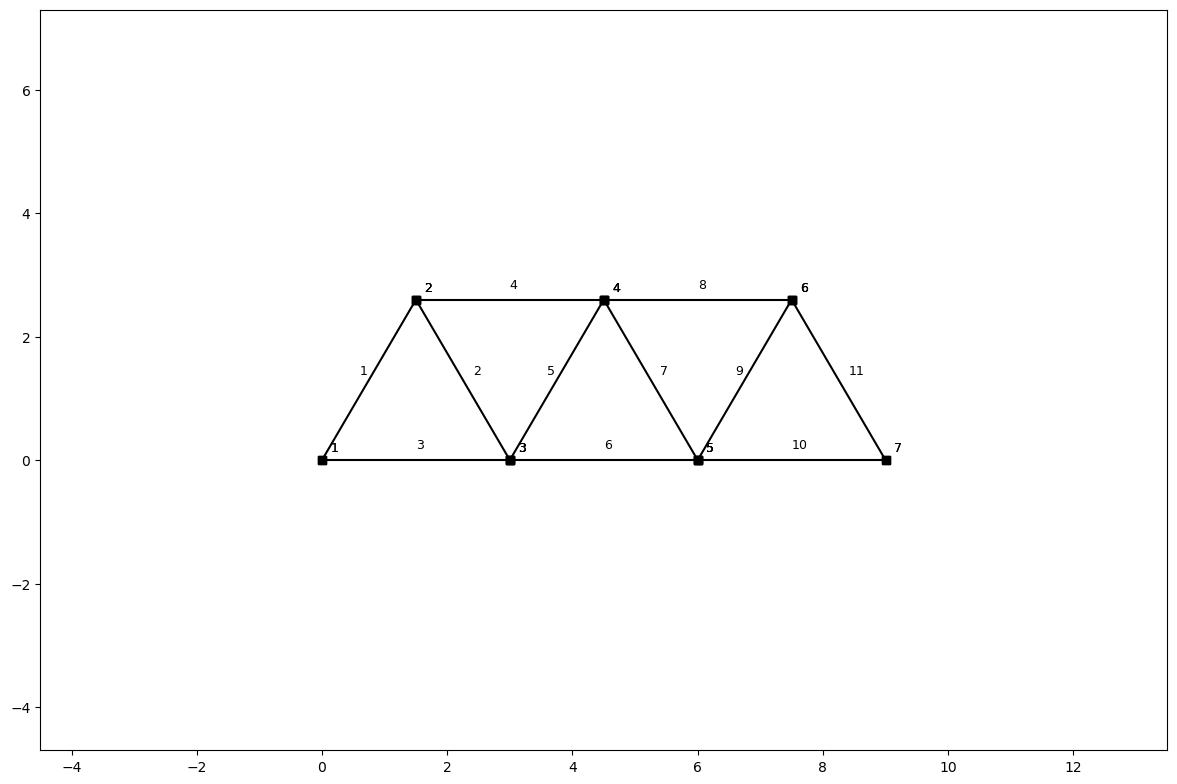

In [1]:
from math import *

#lets import the systemElemnts from the anastruct library
from anastruct import SystemElements
#instatiate the SystemElement object
ss = SystemElements()

θ = radians(60) 
# Tuple of coordinates
A,B,C,D,E,F,G = [0,0],[3*cos(θ),3*sin(θ)],[3,0],[3+3*cos(θ),3*sin(θ)],[6,0],[6+3*cos(θ),3*sin(θ)],[9,0]

#lets add truss members at node using add_truss_element method and passing coordinate loaction as argument to 
#define length of each member
ss.add_truss_element(location=[A, B])
ss.add_truss_element(location=[B, C])
ss.add_truss_element(location=[A, C]) 
ss.add_truss_element(location=[B, D])
ss.add_truss_element(location=[C, D])
ss.add_truss_element(location=[C, E])
ss.add_truss_element(location=[D, E])
ss.add_truss_element(location=[D, F])
ss.add_truss_element(location=[E, F])
ss.add_truss_element(location=[E, G])
ss.add_truss_element(location=[F, G])

#this method plot our assemble structure
ss.show_structure()

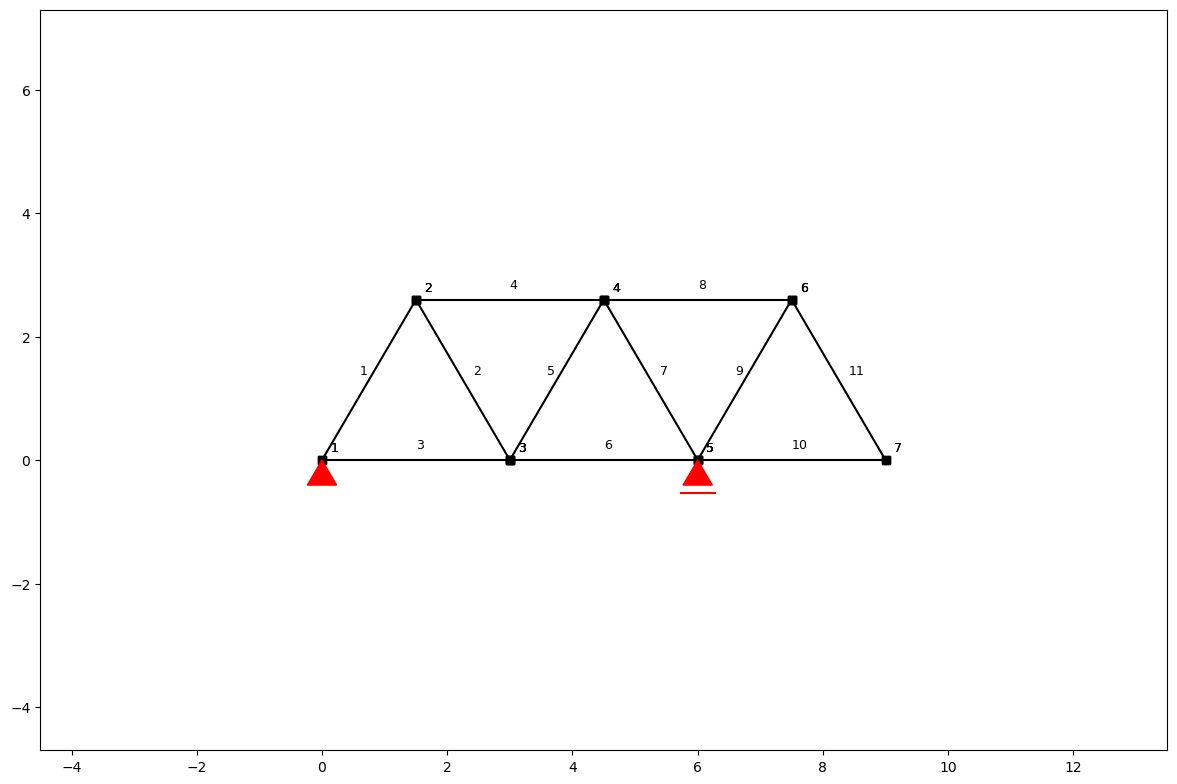

In [2]:
# Add support condition

ss.add_support_hinged(node_id = 1) 

ss.add_support_roll(node_id = 5)

ss.show_structure()

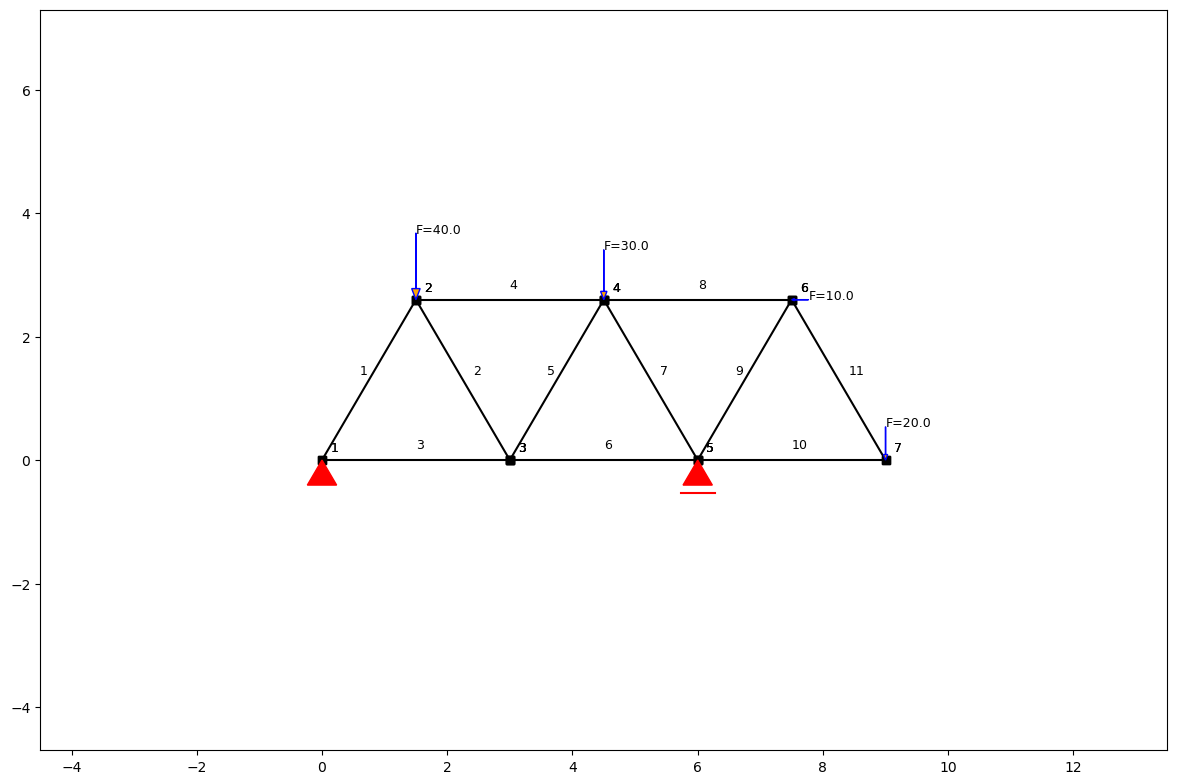

In [3]:
# Add loadings
ss.point_load(Fy=-40, node_id=2)
ss.point_load(Fy=-30, node_id=4)

ss.point_load(Fx=-10, node_id=6)
ss.point_load(Fy=-20, node_id=7)
ss.show_structure()

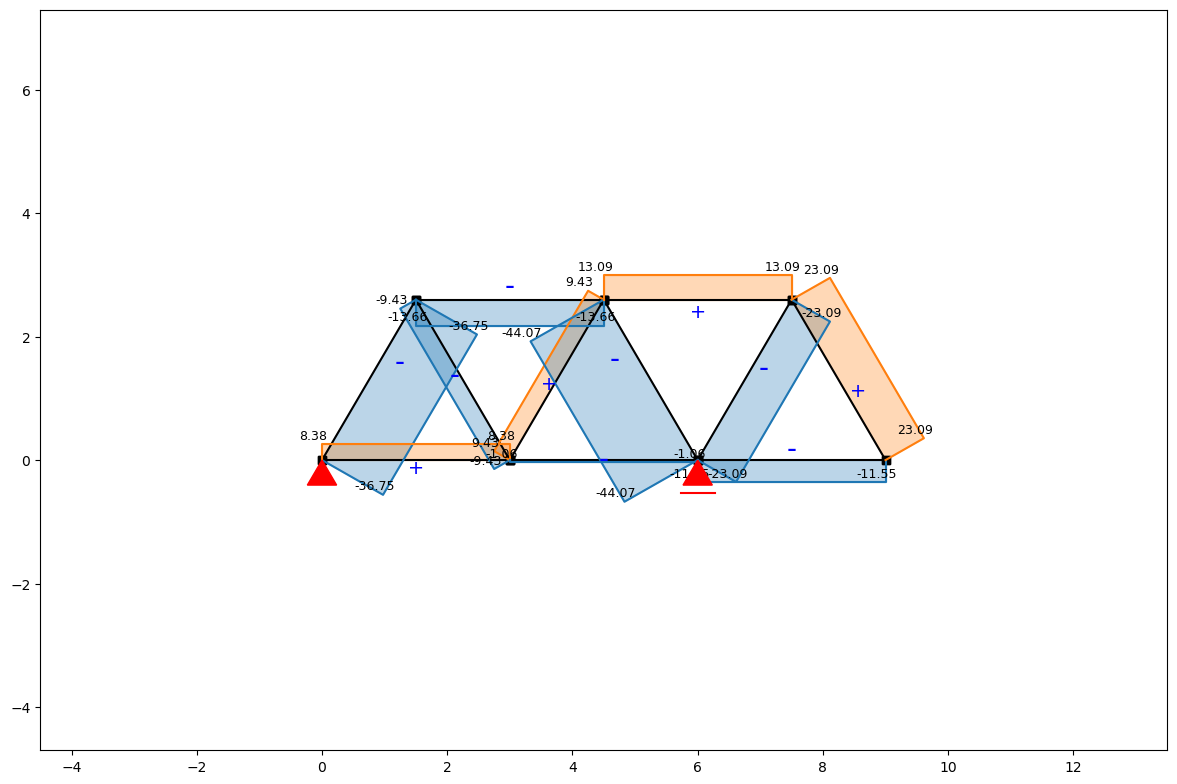

In [4]:
#this method compute all the reaction forces and axial forces in the model
ss.solve()
#this method plot the computed axial forces of the truss elements or members  
ss.show_axial_force()

In [5]:
import pandas as pd
df = pd.DataFrame(ss.get_element_results())

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df  = df[['id', 'length','Nmax']]
df.to_excel('result-5.xlsx')